# 04 Trend Forecasting

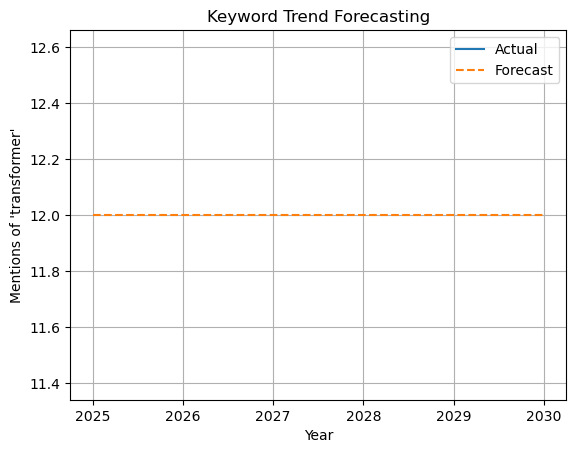

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import os

os.makedirs("../data/raw", exist_ok=True)

df = pd.read_csv("../data/raw/arxiv_papers.csv")
df['published'] = pd.to_datetime(df['published'])
df['year'] = df['published'].dt.year

keyword = "transformer"
df['has_keyword'] = df['summary'].str.lower().str.contains(keyword)

trend = df.groupby('year')['has_keyword'].sum().reset_index()

X = trend['year'].values.reshape(-1, 1)
y = trend['has_keyword'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(2025, 2031).reshape(-1, 1)
future_preds = model.predict(future_years)

plt.plot(trend['year'], trend['has_keyword'], label='Actual')
plt.plot(future_years, future_preds, label='Forecast', linestyle='--')
plt.xlabel("Year")
plt.ylabel(f"Mentions of '{keyword}'")
plt.title("Keyword Trend Forecasting")
plt.legend()
plt.grid(True)
plt.show()